In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 1. 读文件 ------------------------------------------------------------------
log_path = './train.log'          # <── 改成你的文件名
with open(log_path, 'r', encoding='utf-8') as f:
    text = f.read()

# 2. 正则模板 -----------------------------------------------------------------
epoch_re   = re.compile(r'\[ Epoch (\d+) of \d+ \]')
train_re   = re.compile(r'- \(Train\)\s*bce:\s*(\d+\.\d+),\s*mse:\s*(\d+\.\d+),\s*acc:\s*(\d+\.\d+).+?pearson:\s*(\d+\.\d+),\s*spearman:\s*(\d+\.\d+),\s*elapse:\s*(\d+\.\d+)')
valid_re   = re.compile(r'- \(Valid\)\s*bce:\s*(\d+\.\d+),\s*acc:\s*(\d+\.\d+).+?pearson:\s*(\d+\.\d+),\s*spearman:\s*(\d+\.\d+),\s*elapse:\s*(\d+\.\d+)')

# 3. 解析 ---------------------------------------------------------------------
epochs   = []
train_v  = {k: [] for k in ['bce','mse','acc','pearson','spearman','elapse']}
valid_v  = {k: [] for k in ['bce','acc','pearson','spearman','elapse']}

for line in text.splitlines():
    m_epoch = epoch_re.search(line)
    if m_epoch:
        cur_epoch = int(m_epoch.group(1))
        epochs.append(cur_epoch)
        continue

    m_train = train_re.search(line)
    if m_train:
        for idx, k in enumerate(['bce','mse','acc','pearson','spearman','elapse']):
            train_v[k].append(float(m_train.group(idx+1)))
        continue

    m_valid = valid_re.search(line)
    if m_valid:
        for idx, k in enumerate(['bce','acc','pearson','spearman','elapse']):
            valid_v[k].append(float(m_valid.group(idx+1)))

epochs = np.array(epochs)


In [3]:
{k:len(v) for k, v in train_v.items()}

{'bce': 17, 'mse': 17, 'acc': 17, 'pearson': 17, 'spearman': 17, 'elapse': 17}

In [4]:
{k:len(v) for k, v in valid_v.items()}


{'bce': 17, 'acc': 17, 'pearson': 17, 'spearman': 17, 'elapse': 17}

In [5]:
epochs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

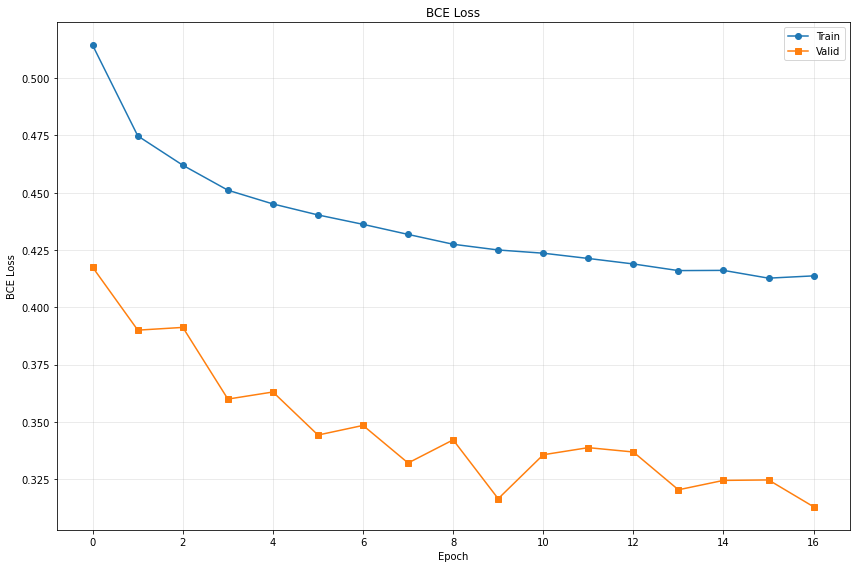

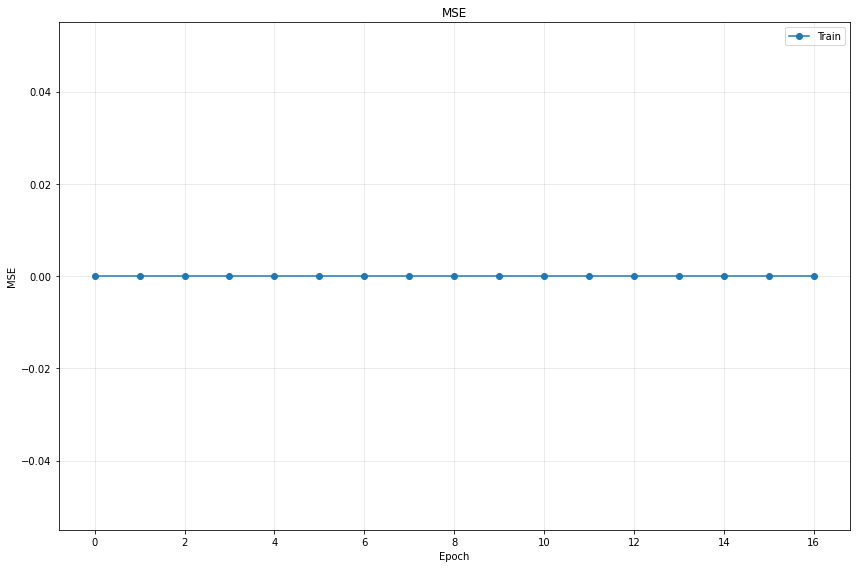

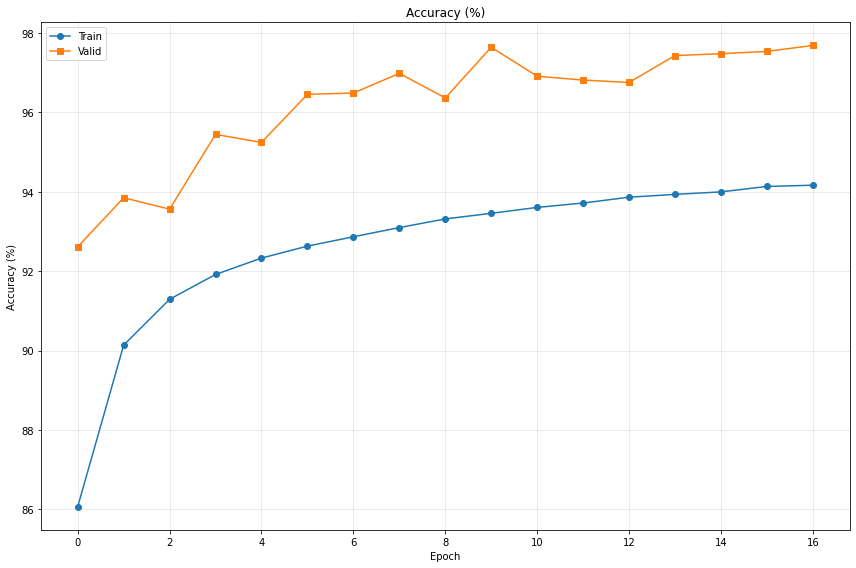

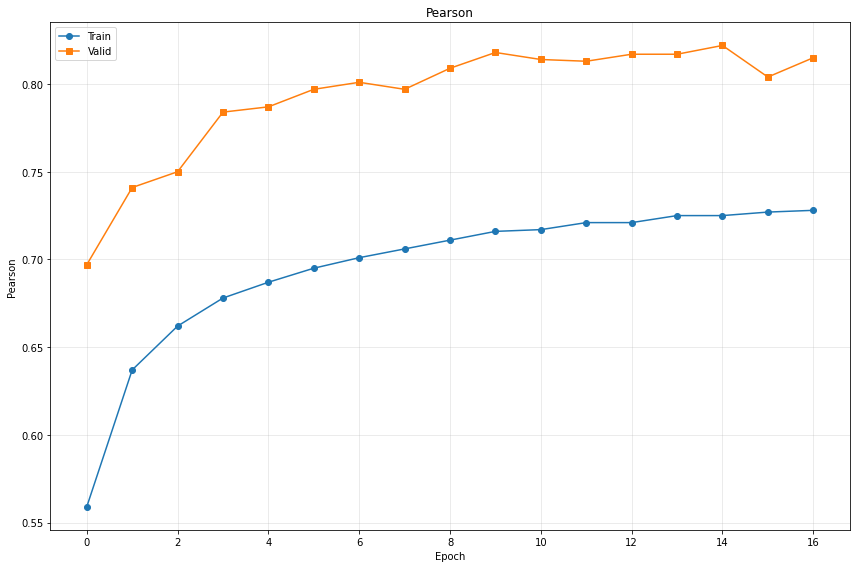

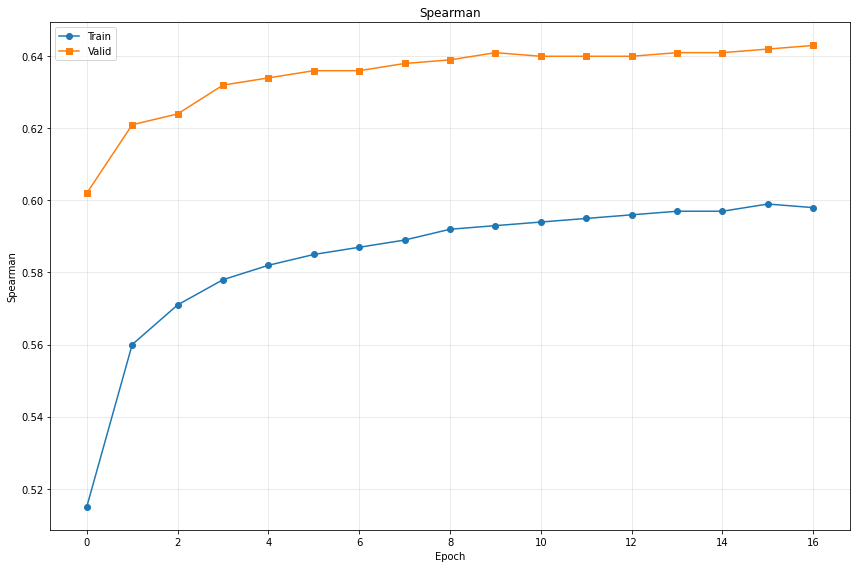

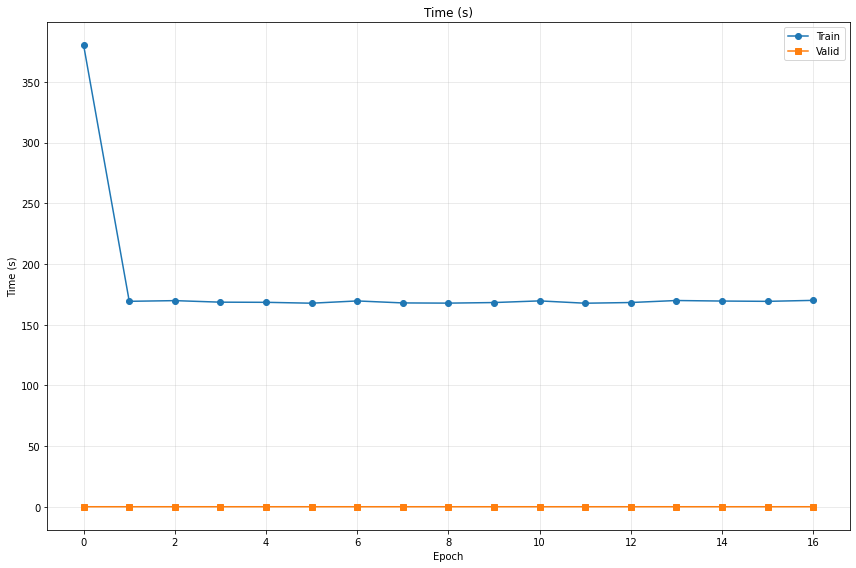

In [6]:

# 4. 画图 ----------------------------------------------------------------------
plt.rcParams['figure.figsize'] = (12, 8)
keys = ['bce','mse','acc','pearson','spearman','elapse']
titles = dict(bce='BCE Loss', mse='MSE', acc='Accuracy (%)',
              pearson='Pearson', spearman='Spearman', elapse='Time (s)')

for k in keys:
    plt.figure()
    plt.plot(epochs, train_v[k], label='Train', marker='o')
    if k in valid_v:                       # mse 没有 valid
        plt.plot(epochs, valid_v[k], label='Valid', marker='s')
    plt.title(titles[k])
    plt.xlabel('Epoch')
    plt.ylabel(titles[k])
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{k}.png', dpi=150)
    plt.show()
